## 1. Import the Libraries

In [1]:
# Import Numpy, Pandas, Matplotlib, Seaborn and Keras libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import keras

Using TensorFlow backend.


In [2]:
# Import Models, Layers, Callbacks and Optimizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

#### Explanation:
- **Sequential** - Sequence of Layers as a Neural Network model in Keras
- **load_model** - Loads a model saved
- **Dense** - Fully Connected Layer (FC)
- **Activation** - Activation Function for adding non-linearity (ReLU)
- **Dropout** - Dropout Layer to prevent overfitting by turn off the actual neuron
- **BatchNormalization** - Batch Normalization Layer to normalize and scale inputs or activations
- **EarlyStopping** - Stop training when a monitored metric has stopped improving
- **ModelCheckpoint** - Callback to save the Keras model or model weights at some frequency
- **Adam** - Optimizer that implements the Adam algorithm

## 2. Load the Data

In [3]:
# Load the dataset (read from .csv file and set it to a Pandas DataFrame)
lending_df = pd.read_csv('data/Lending_Club_Loan_two.csv')

In [4]:
# Load the dataset of features description (read from .csv file and set it to a Pandas DataFrame)
data_info = pd.read_csv('data/Lending_Club_Loan_info.csv', index_col='LoanStatNew')

## 3. Exploratory Data Analysis

- Study the dataset and describe the columns to understand the data
- Aim is to gain intuition about the data, good understanding of the dataset, some notes for Data Cleaning, and possibly some ideas for Feature Engineering

### 3.1 Check out the Data

#### Insights we could draw from the data:
1. To get to know the data
2. Answer a set of basic questions about the dataset:	
    - How many observations do we have?
	- How many features?
        - Which features are available in the dataset?
	- What are the data types of the features?
        - Which features are numerical?
        - Which features are categorical?
        - Which features are mixed data types?
	- Do we have a target variable (label)?
    - What is the distribution of numerical feature values across the samples?

In [5]:
# Display the few top rows of a DataFrame
lending_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [6]:
# Shape of the dataset
lending_df.shape

(396030, 27)

In [7]:
# List of the column names
lending_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [8]:
# List of all numerical columns
lending_df.select_dtypes(include='number').columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [9]:
# List of all non-numerical columns
lending_df.select_dtypes(exclude='number').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [10]:
# Data type of each column in a DataFrame
lending_df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [11]:
# Find out how many entries (rows and columns) there are, what type of objects are in the DataFrame (to observe if they have the correct type) etc.
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [12]:
# Summarize the data to see the distribution of data (Statistical information of numerical columns)
lending_df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [13]:
# Summarize the data to see the distribution of data (Statistical information of non-numerical columns)
lending_df.describe(exclude='number')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USS Johnson\nFPO AE 48052
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


#### Conclusion:
- The dataset contains 396030 rows and 27 columns
    - **Number of observations**: 396030
    - **Number of attributes**: 26 predictor variables and 1 target variable
        - **Predictor variables (features)** are: ''loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address'
        - **Target variable (label)** is: 'loan_status'
- Types of the data contained within columns are float64 (12 columns) and object (15 columns)
    - **Numerical variables (features)** are: 'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'
    - **Non-numerical variables (features)** are: 'term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'
- There are missing values in several columns of the dataset
- So far, there are no feature(s) that is/are of no significance and cannot provide any insight into the dataset

In [14]:
# Feature information function on the data
print(data_info.loc['loan_status']['Description'])

Current status of the loan


In [15]:
# Generate descriptive statistics of the column
lending_df['loan_status'].describe()

count         396030
unique             2
top       Fully Paid
freq          318357
Name: loan_status, dtype: object

In [16]:
# Check the number of unique values in the column
lending_df['loan_status'].nunique()

2

In [17]:
# Check the unique values and counts of unique values
lending_df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [18]:
# Status counts as percentages
lending_df['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

#### Conclusion:
- Target variable (label) is 'loan_status' column, it has 2 unique values (binary format) ('Fully Paid' and 'Charged Off') and its data type is object
- The target variable (label) is categorical, which means that predicting of the target variable (label) is a Classification problem
- **Class distribution** (Number of observations (rows) that belong to each class (category)):
    - class 0: 318357 (80%)
    - class 1: 77673 (20%)
- Each class does not have a same number of observations (80% vs. 20%) (imbalanced class distribution)

### 3.2 Data Visualization

- Overall goal is **to visualize the data** and to get understanding of **which features are important** for analysis 
- **Types of plots for visualization**:
    - **Univariate plots**
        - plots of each **individual feature**
        - to better **understand each feature**
        - use Count plot, Bar plot, Histogram, Dist plot, Box plot, Whisker plot etc.
    - **Multivariate plots**
        - plots of several **(multi) features**
        - to better **understand the relationships between features**
        - Scatter plot, Heatmap, Pair plot, Bar plot etc.
- In order to select the appropriate plots for visualization, first **understand the Data Variables type (Numerical or Categorical)**:
    - Plot Categorical Distributions
    - Plot Numerical Distributions
    - Plot Correlations
    - Plot Segmentations

#### Insights we could draw from the charts:
**1. Plot Categorical Distributions**
   - Use Bar plot, Count plot
   - What is the range where the categorical feature have a large number of observations?
   - Is there are any sparse classes (classes that have a very small number of observations)?
   - Making a note to combine or reassign some of the sparse classes

**2. Plot Numerical Distributions**
   - Use Grid of Histograms, Distplot
   - What is the range where the target label is most distributed? (Check the distribution of target variable)
   - Potential outliers that don't make sense
   - Distributions that are unexpected
   - Features that should be binary (i.e. "wannabe indicator variables")
   - Boundaries that don't make sense
   - Potential measurement errors

**3. Plot Correlations**
   - Use Scatterplot, Heatmap, Barplot
   - Observe the relationships between label and all numeric features		
   - Observe the relationships between numeric features and other numeric features		
   - Which features are strongly (positively or negatively) correlated with the target variable (label)?	
   - Are there interesting or unexpected strong correlations between other features? (check for multi-co-linearity)
   - Is there any feature that is perfect predictor of the target variable (label)?
   
**4. Plot Segmentations**
   - Use Box plot
   - Observe the relationships between categorical features and label (Distribution of label per categorical feature)
   - Observe the relationships between categorical features and numeric features (Distribution of numeric feature per categorical feature)
   - Median (middle vertical bar in the box)									
   - Min and Max

In [19]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

#### 3.2.1 Plot Categorical Distributions

- Few things to look out for and insights we could draw from the charts:
   - Use Bar plot, Count plot
   - What is the range where the categorical feature have a large number of observations?
   - Is there are any sparse classes (classes that have a very small number of observations)?
   - Making a note to combine or reassign some of the sparse classes

### 1. `loan_status` feature

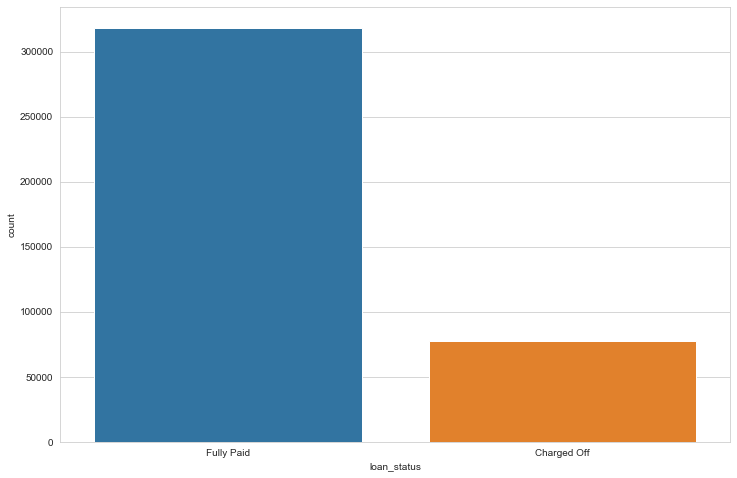

In [20]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of categorical data (target variable (label)) in each categorical bin
sns.countplot(x='loan_status', data=lending_df)

In [21]:
# Counts of unique values
lending_df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [22]:
# Status counts as percentages
lending_df['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

#### Conclusion:
- About 80% of the loans have been 'Fully Paid' and 20% have 'Charged Off', so we have an imbalanced classification problem:
    - Fully Paid = 318357 (80%)
    - Charged Off = 77673 (20%)
- Difference between the two classes is extreme, which means the model will do very well in terms of Accuracy, but Precision and Recall will be true metrics to evaluate the model

**Use *SMOTE: Synthetic Minority Over-sampling Technique* - technique that generates synthetic samples from the minority class**

#### 3.2.2 Plot Numerical Distributions

- Few things to look out for and insights we could draw from the charts:
   - Use Grid of Histograms, Distplot
   - What is the range where the target label is most distributed? (Check the distribution of target variable)
   - Potential outliers that don't make sense
   - Distributions that are unexpected
   - Features that should be binary (i.e. "wannabe indicator variables")
   - Boundaries that don't make sense
   - Potential measurement errors

### 1. `loan_amnt` feature

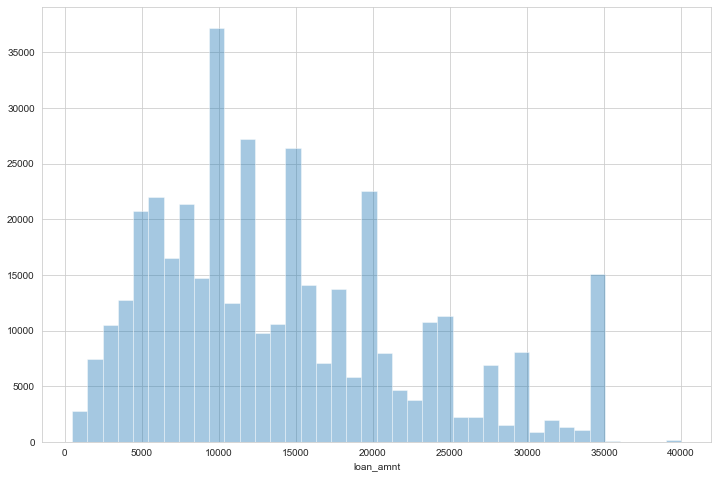

In [23]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of a continious (numeric) feature
sns.distplot(lending_df['loan_amnt'], kde=False, bins=40)

In [24]:
# Compute the arithmetic mean (average) value
lending_df['loan_amnt'].mean()

14113.888089286165

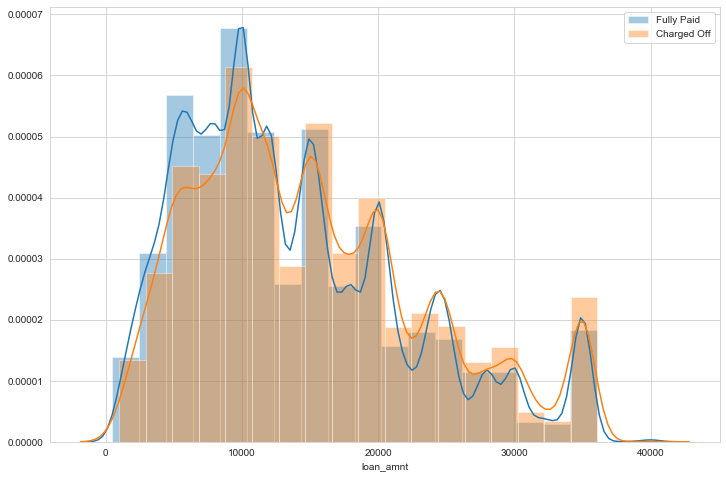

In [25]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of continious (numeric) features by class of categorical data (target variable (label))
for i in lending_df['loan_status'].unique():
    sns.distplot(lending_df['loan_amnt'][lending_df['loan_status']==i], kde=True, label='{}'.format(i), bins=20)

plt.legend()

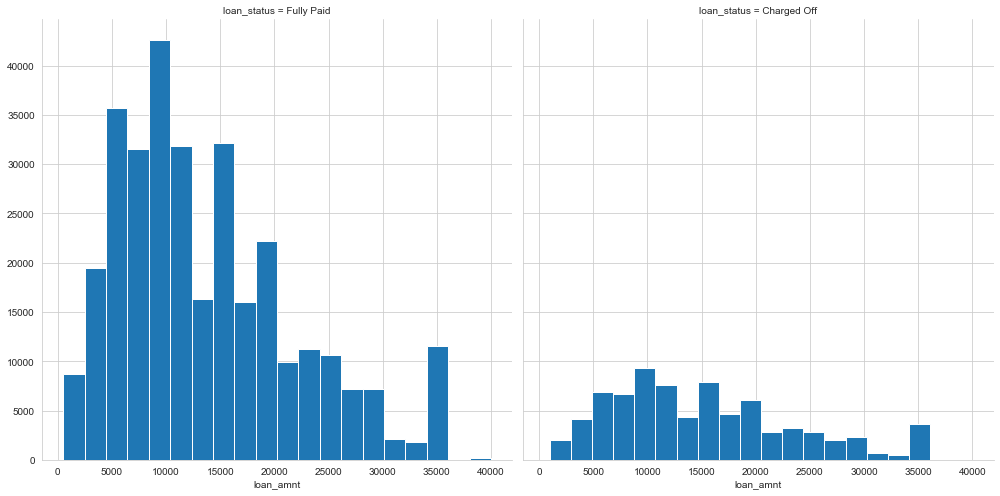

In [26]:
# Display (plot) and explore the conditional relationships between continious (numeric) features
# Initialize a 1x3 grid of facets
g = sns.FacetGrid(lending_df, col='loan_status', height=7)

# Draw a univariate plot on each facet
g.map(plt.hist, 'loan_amnt', bins=20)

#### Conclusion:
- 'Loan amount' are most distributed and falling between 0 and around 35.000 US dollars
- There are some potential outliers around 40.000 US dollars
- Spikes happening at even money amounts (10.000 US dollars, 12.000 US dollars, 15.000 US dollars etc.) as certain amounts are standard loans

#### 3.2.3 Plot Correlations

- Few things to look out for and insights we could draw from the charts:
   - Use Scatterplot, Heatmap, Barplot
   - Observe the relationships between label and all numeric features		
   - Observe the relationships between numeric features and other numeric features		
   - Which features are strongly (positively or negatively) correlated with the target variable (label)?	
   - Are there interesting or unexpected strong correlations between other features? (check for multi-co-linearity)
   - Is there any feature that is perfect predictor of the target variable (label)?

In [27]:
# Display data correlation (correlations between all numerical feature variables)
lending_df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(12, 0)

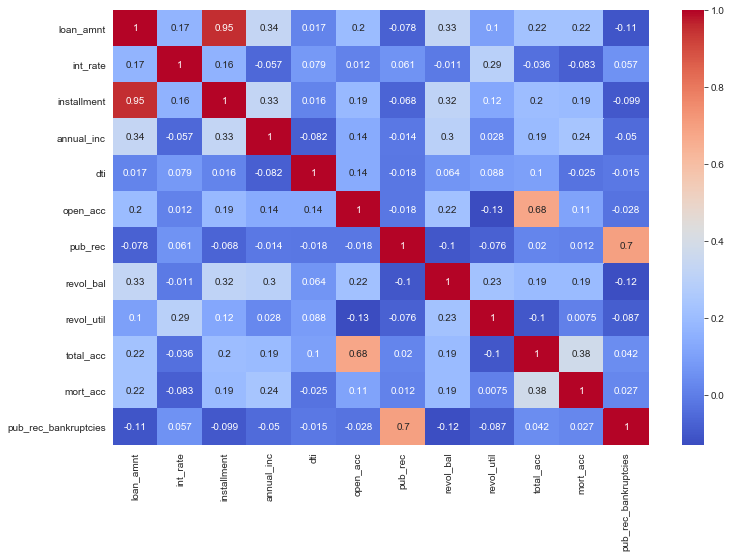

In [28]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore correlations between all numerical feature variables through visualization
ax = sns.heatmap(data=lending_df.corr(), annot=True, cmap='coolwarm')
plt.ylim(12, 0)

#### Conclusion:
- Resulting correlation table and Heatmap show the correlation score between all numerical feature variables
- Almost perfect positive correlation (0.95) between 'loan_amnt' with the "installment" feature and therefore we need to explore the 'installment' feature (perform a scatterplot between both features) in order to make sure that there is no leaking data from features into target variable (label)
    - always make sure that there is no feature that is perfect predictor of label
    - it indicates that it s not a feature, but probaly a duplicate information similar to the label
- Very highly positive correlated values between:
    - 'pub_rec_bunkruptcies' and 'pub_rec' (0.7)
    - 'open_acc' and 'total_acc' (0.68)
- The target variable (label) is of data type 'object' and therefore we cannot calculate and display (plot) the correlation between the target variable (label) and other features

In [29]:
# Feature description
print(data_info.loc['loan_amnt']['Description'])

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [30]:
# Feature description
print(data_info.loc['installment']['Description'])

The monthly payment owed by the borrower if the loan originates.


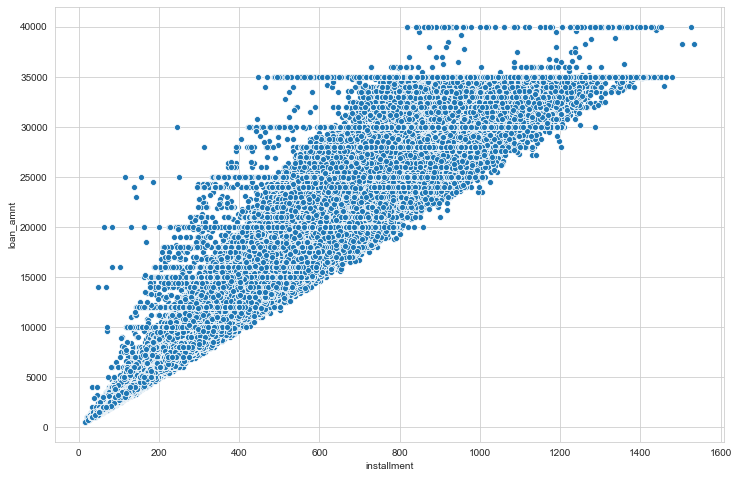

In [31]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the comparison between continuous (numeric) feature variables that have high correlation
sns.scatterplot(x='installment', y='loan_amnt', data=lending_df)

#### Conclusion:
- High correlation between 'installment' and 'loan_amnt' features
- They are probably connected by some formula

#### 3.2.4 Plot Segmentations

- Few things to look out for and insights we could draw from the charts:
   - Use Box plot
   - Observe the relationships between categorical features and label (Distribution of label per categorical feature)
   - Observe the relationships between categorical features and numeric features (Distribution of numeric feature per categorical feature)
   - Median (middle vertical bar in the box)									
   - Min and Max

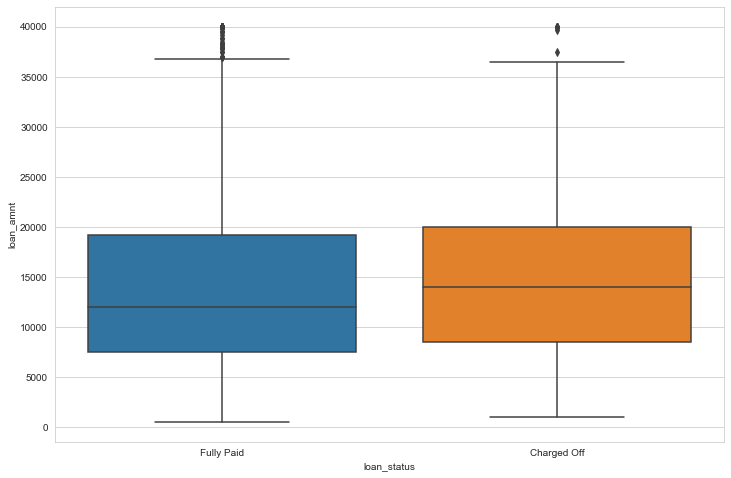

In [32]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of continuous (numeric) feature variable per categorical target variable (label) 
sns.boxplot(x='loan_status', y='loan_amnt', data=lending_df)

In [33]:
# Summary statistics of the continuous (numeric) feature variable, grouped by the categorical target variable (label)
lending_df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


#### Conclusion:
- Distribution of 'loan_amnt' per 'loan_status' is plotted in order to explore and show that there is a slight relationship between expensive loans and not being able to pay them off or very low loan amout and fully paying those off
- Mean (average) value of the loan amounts for people that aren't able to pay them back (15126.300967) is slightly higher than the Mean (average) value of the loan amounts for people that do pay off their loans (13866.878771)
- Max value of the loan amount is the same for each label category, but min value of the loan value is higher for 'Charged Off' loans then 'Fully Paid' loans

## 4. Data Preprocessing and Feature Engineering

#### Data Preprocessing and Feature Engineering by:
- check the relationship of the columns (features) with the target variable (label)
    - drop the columns (features) which are of no significance and cannot provide any insight into the dataset
- check the missing values by columns (features) and rows (observations)
    - drop the columns (features) and rows (observations) with missing values
    - fill in the missing values in columns (features)
    - drop the columns (features) which are of no significance and cannot provide any insight into the dataset
- convert to a Dummy variable feature using One-hot coding
- extracting the Date
- remove erroneous values
- redundant data
- nullify the impact of outliers
- etc.

### 4.1 Identify the variables

Look at the columns of the dataset which can act as:
- Predictor variables (features)
- Target variable (label)

In [34]:
# List of the column names
lending_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

#### Conclusion:
- **Predictor variables (features)** are: 'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address'
- **Target variable (label)** is: 'loan_status'

### 4.2 Dealing with Missing values

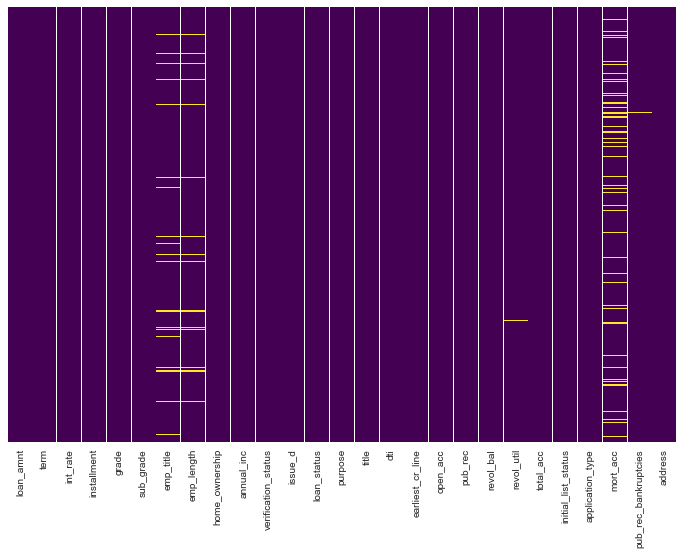

In [35]:
# Set up of the graphic area size
plt.figure(figsize=(12, 8))

# Display (plot) the missing values
sns.heatmap(data=lending_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [36]:
# Total count of missing (null) values for each column and sort them in ascending order
lending_df.isnull().sum().sort_values(ascending=False)

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
address                     0
verification_status         0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
purpose                     0
issue_d                     0
loan_status                 0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
initial_list_status         0
application_type            0
loan_amnt                   0
dtype: int64

In [37]:
# Total count of missing (null) values for each column in % of the total DataFrame and sort them in ascending order
lending_df.isnull().mean().sort_values(ascending=False)*100

mort_acc                9.543469
emp_title               5.789208
emp_length              4.621115
title                   0.443148
pub_rec_bankruptcies    0.135091
revol_util              0.069692
address                 0.000000
verification_status     0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
purpose                 0.000000
issue_d                 0.000000
loan_status             0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
loan_amnt               0.000000
dtype: float64

#### Conclusion:
- **Missing values per feature**:
    - mort_acc = 37.795 (9.54%)
    - emp_title = 22.927 (5.79%)
    - emp_length = 18.301 (4.62%)
    - title = 1.755 (0.44%)
    - pub_rec_bankruptcies = 535 (0.14%)
    - revol_util = 276 (0.07%)

#### 4.2.1 Dealing with Missing values in Columns

**Missing values in Columns:**
1. emp_title = 22.927 (5.79%)
2. emp_length = 18.301 (4.62%)
3. title = 1.755 (0.44%)
4. mort_acc = 37.795 (9.54%)

### 1. `emp_title` feature

In [38]:
# Feature description
print(data_info.loc['emp_title']['Description'])

The job title supplied by the Borrower when applying for the loan.*


In [39]:
# Check the number of unique values in the column
lending_df['emp_title'].nunique()

173105

In [40]:
# Check the unique values and counts of unique values
lending_df['emp_title'].value_counts()

Teacher                             4389
Manager                             4250
Registered Nurse                    1856
RN                                  1846
Supervisor                          1830
                                    ... 
Clinician/Therapist                    1
MATERIAL PLANNER LEAD                  1
Radiology Corporation of America       1
Arizona & California R.R.              1
Warehouse/Truck Driver                 1
Name: emp_title, Length: 173105, dtype: int64

#### Conclusion:
- Number of missing values (percentage of missing values) is around the acceptable limit to remove the feature
- Too many unique job titles to try to convert to a dummy variable feature
- Drop the 'emp_title' column

In [41]:
# Drop column (feature) from the table
lending_df.drop('emp_title', axis=1, inplace=True)

In [42]:
# Display the few top rows of a DataFrame
lending_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


### 2. `emp_length` feature

In [43]:
# Feature description
print(data_info.loc['emp_length']['Description'])

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [44]:
# Check the number of unique values in the column
lending_df['emp_length'].nunique()

11

In [45]:
# Check the unique values and counts of unique values
lending_df['emp_length'].value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

In [46]:
# Check the unique values, count the unique values and sort them
sorted(lending_df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

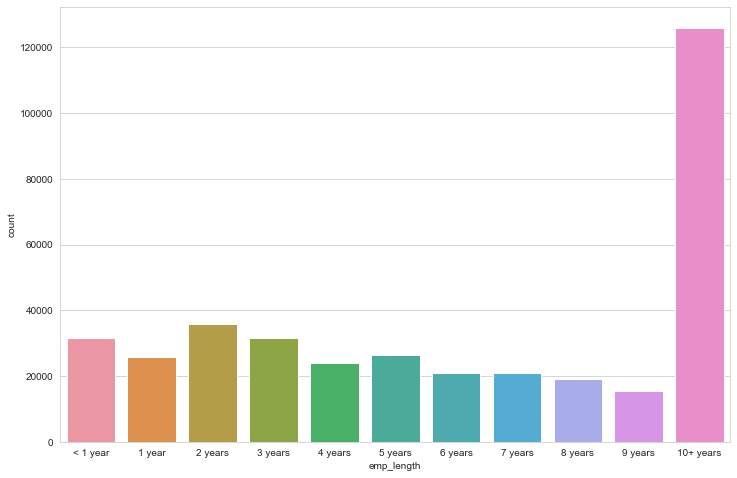

In [47]:
# Set up of the graphic area size
plt.figure(figsize=(12, 8))

emp_length_order = ['< 1 year',
                     '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

# Display (plot) and explore the distribution of categorical data in each categorical bin
sns.countplot(x='emp_length', data=lending_df, order=emp_length_order)

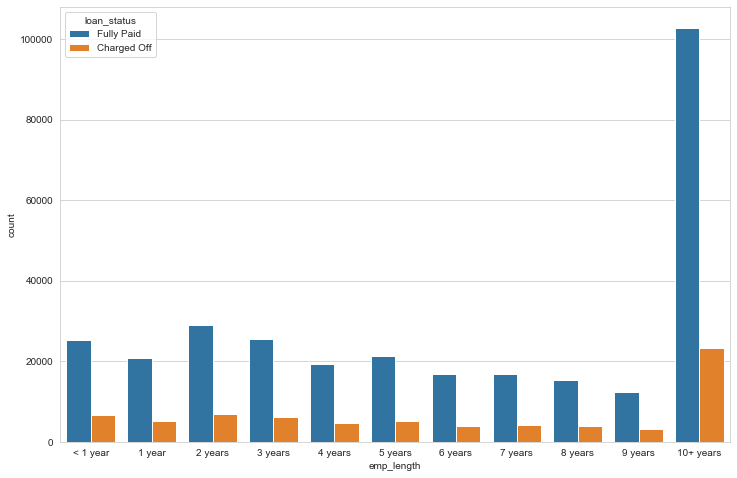

In [48]:
# Set up of the graphic area size
plt.figure(figsize=(12, 8))

emp_length_order = ['< 1 year',
                     '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

# Display (plot) and explore the distribution of categorical data in each categorical bin per target variable (label)
sns.countplot(x='emp_length', data=lending_df, order=emp_length_order, hue='loan_status')

#### Conclusion:
- No information if there is a strong relationship between employment length and being 'Fully Paid' or 'Charged Off'
- Do percentage of 'Charge Off' per category of emp_length ('Charged Off' rates)

In [49]:
# Groupby the 'emp_length' column and calculate the count value for the category in target variable (label) ('Charged Off') per category in 'emp_length'
emp_co = lending_df[lending_df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [50]:
# Groupby the 'emp_length' column and calculate the count value for the category in target variable (label) ('Fully Paid') per category in 'emp_length'
emp_fp = lending_df[lending_df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

In [51]:
# Ratio between the 'Fully Paid' vs. 'Charged Off' counts per category of 'emp_length'
emp_len = emp_co/emp_fp

In [52]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

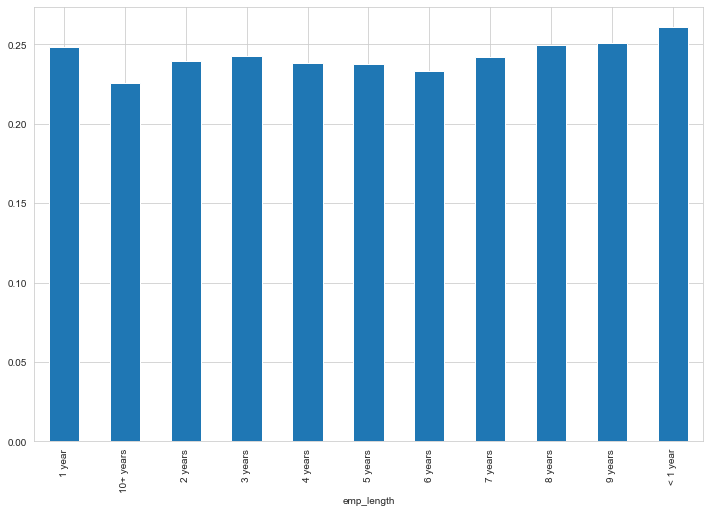

In [53]:
# Set up of the graphic area size
plt.figure(figsize=(12, 8))

# Display (plot) and explore the values per column
emp_len.plot(kind='bar')

#### Conclusion:
- 'Charged Off' rates are extremely similar across all employment lengths and they do not depends on the length of employment
- Drop the 'emp_title' column

In [54]:
# Drop column (feature) from the table
lending_df.drop('emp_length', axis=1, inplace=True)

In [55]:
# Display the few top rows of a DataFrame
lending_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [56]:
# Total count of missing (null) values for each column and sort them in ascending order
lending_df.isnull().sum().sort_values(ascending=False)

mort_acc                37795
title                    1755
pub_rec_bankruptcies      535
revol_util                276
loan_status                 0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
address                     0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
initial_list_status         0
application_type            0
loan_amnt                   0
dtype: int64

### 3. `title` feature

In [57]:
# Feature description
print(data_info.loc['title']['Description'])

The loan title provided by the borrower


In [58]:
# Check information in column
lending_df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

#### Conclusion:
- The 'title' column is a string subcategory / description of the 'purpose' column
- Drop the 'title' column

In [59]:
# Drop column (feature) from the table
lending_df.drop('title', axis=1, inplace=True)

In [60]:
# Display the few top rows of a DataFrame
lending_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


### 4. `mort_acc` feature

In [61]:
# Feature description
print(data_info.loc['mort_acc']['Description'])

Number of mortgage accounts.


In [62]:
# Check the number of unique values in the column
lending_df['mort_acc'].nunique()

33

In [63]:
# Check the unique values and counts of unique values
lending_df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [64]:
# Check the correlations between numeric feature variable ('mort_acc') and other numeric feature variables, and sort the correlations
lending_df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

#### Conclusion:
- The 'mort_acc' feature correlates with the 'total_acc' feature
- Try fillna() approach to fill in the missing values in 'mort_acc' column by groupping the DataFrame by the 'total_acc' and calculate the Mean value for the 'mort_acc' per 'total_acc'

In [65]:
# Groupby the correlated column ('total_acc') and calculate the mean value for the column ('mort_acc') per correlated column ('total_acc')
total_acc_avg = lending_df.groupby('total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [66]:
# Check the mean value for random 'mort_acc' value (5.0)
total_acc_avg[5.0]

0.10328947368421053

In [67]:
# Create function that accepts the values of two columns for the row and checks if the value is NaN or not
def fill_mort_acc(total_acc, mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN.
    If so, it returns the avgerage mort_acc value for the corresponding total_acc value for that row.
    total_acc_avg here should be a Series or dictionary containing the mapping of
    the groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [68]:
# Fill in all missing values in column with the calculated value of the particular (correlated) column
lending_df['mort_acc'] = lending_df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [69]:
# Total count of missing (null) values for each column and sort them in ascending order
lending_df.isnull().sum().sort_values(ascending=False)

pub_rec_bankruptcies    535
revol_util              276
address                   0
loan_status               0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
loan_amnt                 0
dtype: int64

#### Conclusion:
- Number of missing values (percentage) in columns pub_rec_bankruptcies = 535 (0.14%) and revol_util = 276 (0.07%) is very low, and therefore we can drop these rows
- Drop all rows with missing values where any of the elements are missing value (rows in 'pub_rec_bankruptcies' and 'revol_util' columns)

### 5. `purpose` feature

In [70]:
# Feature description
print(data_info.loc['purpose']['Description'])

A category provided by the borrower for the loan request. 


In [71]:
# Check information in column
lending_df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

#### 4.2.2 Dealing with Missing values in Rows

**Missing values in Rows:**
1. pub_rec_bankruptcies = 535 (0.14%)
2. revol_util = 276 (0.07%)

In [72]:
# Remove all rows with missing values where any of the elements are missing values
lending_df.dropna(axis=0, how='any', inplace=True)

In [73]:
# Total count of missing (null) values for each column and sort them in ascending order
lending_df.isnull().sum().sort_values(ascending=False)

address                 0
pub_rec_bankruptcies    0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
loan_amnt               0
dtype: int64

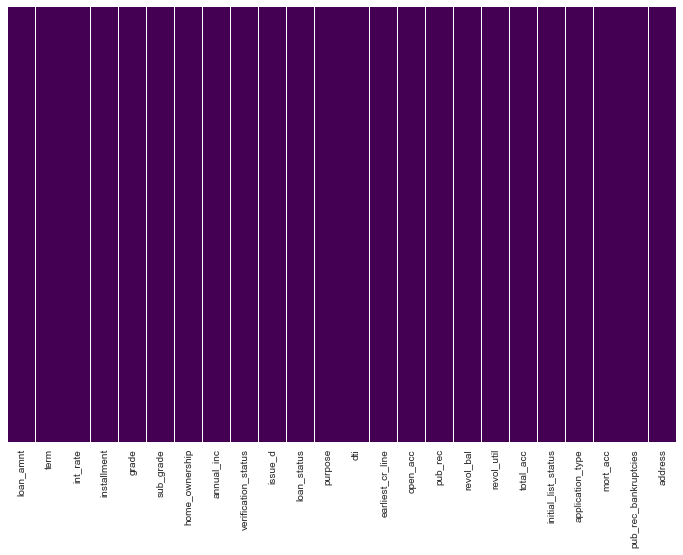

In [74]:
# Set up of the graphic area size
plt.figure(figsize=(12, 8))

# Display (plot) the missing values
sns.heatmap(data=lending_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Conclusion:
- No missing values in the dataset

### 4.3 Dealing with the Categorical features

In [75]:
# List all non-numerical columns
lending_df.select_dtypes(exclude='number').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### Conclusion:
- **Non-numerical variables (features)** are 'term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address'

### 1. `loan_status` feature

In [76]:
# Feature description
print(data_info.loc['loan_status']['Description'])

Current status of the loan


In [77]:
# Finding all unique values in the column
lending_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [78]:
# Create a new column 'loan_repaid' from column 'loan_status'
lending_df['loan_repaid'] = lending_df['loan_status'].map({'Fully Paid': 1, 'Charged Off': 0})

In [79]:
# Select two columns
lending_df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


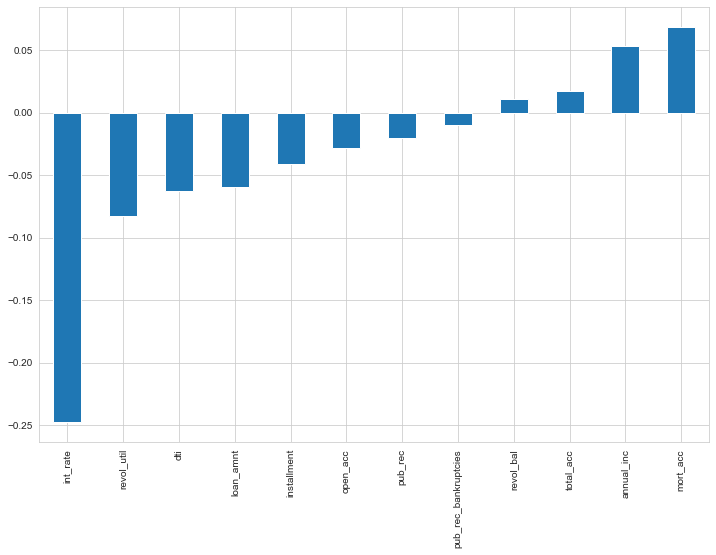

In [80]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) the correlations between the target variable (label) and other continuous (numeric) feature variables through visualization
lending_df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')

In [81]:
# Check the correlation between the target variable (label) and other continuous (numeric) feature variables
lending_df.corr()['loan_repaid'].sort_values(ascending=False)

loan_repaid             1.000000
mort_acc                0.068861
annual_inc              0.053545
total_acc               0.017852
revol_bal               0.010793
pub_rec_bankruptcies   -0.009403
pub_rec                -0.019900
open_acc               -0.028134
installment            -0.040936
loan_amnt              -0.059731
dti                    -0.062390
revol_util             -0.082296
int_rate               -0.247826
Name: loan_repaid, dtype: float64

#### Conclusion:
- Resulting table and Heatmap show the correlation score between the target variable (label) and other continuous (numeric) feature variables
- 'int_rate' has the highest negative correlation (-0.25) with 'loan_repaid' (the target variable (label))
- There is no feature(s) that is/are perfect predictor(s) of the target variable (label)

### 2. `grade` feature

In [82]:
# Feature information function on the data
print(data_info.loc['grade']['Description'])

LC assigned loan grade


In [83]:
# Show all unique values in the column and sort them
sorted(lending_df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

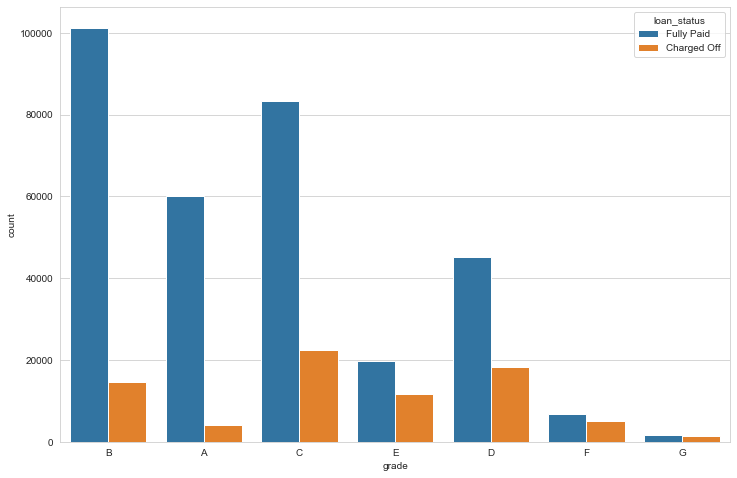

In [84]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of categorical data in each categorical bin per target variable (label)
sns.countplot(x='grade', data=lending_df, hue='loan_status')

#### Conclusion:
- Difference between 'Fully Paid' loans and 'Charged Off' loans based on the 'Grade'
- Percentage of 'Charged Off' loans vs. 'Fully Paid' loans increases as the 'Grade' gets higher (highest for F and G grades)

### 3. `sub_grade` feature

In [85]:
# Feature description
print(data_info.loc['sub_grade']['Description'])

LC assigned loan subgrade


In [86]:
# Show all unique values in the column and sort them
sorted(lending_df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

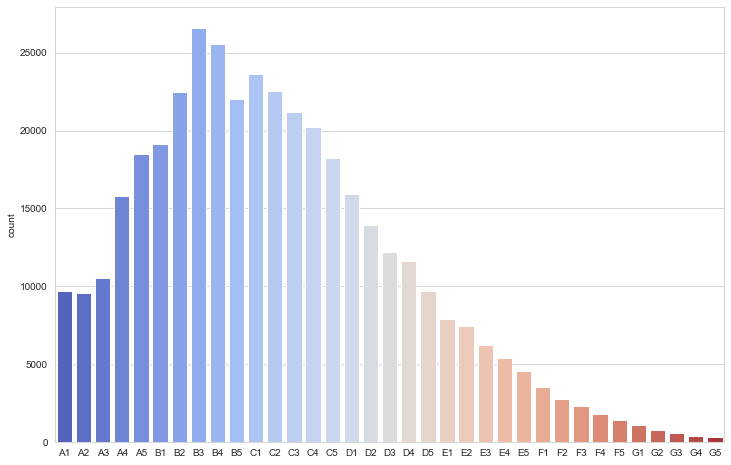

In [87]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of categorical data in each categorical bin
sns.countplot(x=sorted(lending_df['sub_grade']), data=lending_df, palette='coolwarm')

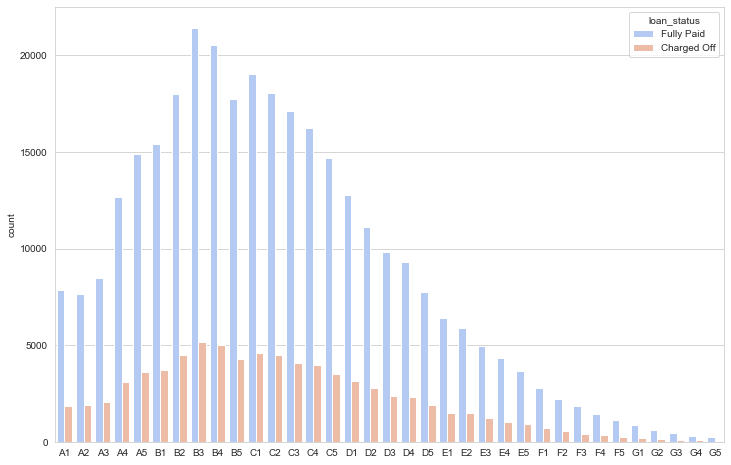

In [88]:
# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of categorical data in each categorical bin per target variable (label)
sns.countplot(x=sorted(lending_df['sub_grade']), data=lending_df, hue='loan_status', palette='coolwarm')

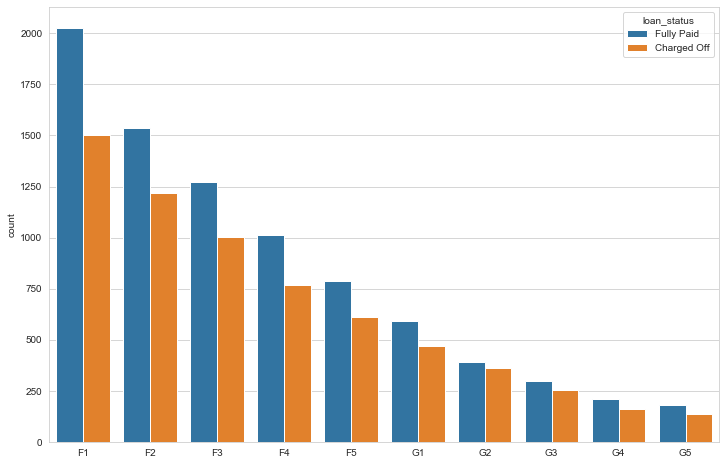

In [89]:
# Create subset in a DataFrame
f_and_g = lending_df[(lending_df['grade']=='F') | (lending_df['grade']=='G')]

# Set up of the graphic area size
plt.figure(figsize=(12,8))

# Display (plot) and explore the distribution of categorical data in each categorical bin per target variable (label)
sns.countplot(x=sorted(f_and_g['sub_grade']), data=f_and_g, hue='loan_status')

#### Conclusion:
- Percentage of 'Charged Off' loans vs. 'Fully Paid' loans is almost same for worst Sub-Grade catrgories (F1-G5)

In [90]:
# Create a new column indicating the categorical data (0 or 1)
sub_grade_dummy = pd.get_dummies(lending_df['sub_grade'], drop_first=True)

In [91]:
# Concatination of dummy columns to actual DataFrame
lending_df = pd.concat([lending_df, sub_grade_dummy], axis=1)

In [92]:
# Drop column (feature) from the table
lending_df.drop('sub_grade', axis=1, inplace=True)

In [93]:
# Check the head of the Pandas DataFrame
lending_df.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36 months,11.44,329.48,B,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36 months,11.99,265.68,B,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36 months,10.49,506.97,B,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36 months,6.49,220.65,A,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60 months,17.27,609.33,C,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# List of all columns
lending_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

### 4. `term` feature

In [95]:
# Feature description
print(data_info.loc['term']['Description'])

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [96]:
# Check the unique values and counts of unique values
lending_df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [97]:
# Convert the 'object' feature into 'integer' numeric data type (slicing only the numbers)
lending_df['term'] = lending_df['term'].apply(lambda term: int(term[:3]))

In [98]:
# Status counts as percentages
lending_df['term'].value_counts(normalize=True, dropna=False)

36    0.762228
60    0.237772
Name: term, dtype: float64

In [99]:
# Compare the charge-off rate by loan period
lending_df.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.157701
60    0.319414
Name: loan_status, dtype: float64

#### Conclusion:
- About 76% of the completed loans have three-year periods, and the rest have five-year periods
- Loans with five-year periods are more than twice as likely to charge-off as loans with three-year periods

### 5. `verification_status`, `application_type`, `initial_list_status` and `purpose` features

In [100]:
# Feature information function on the data
print(data_info.loc['verification_status']['Description'])
print(data_info.loc['application_type']['Description'])
print(data_info.loc['initial_list_status']['Description'])
print(data_info.loc['purpose']['Description'])

Indicates if income was verified by LC, not verified, or if the income source was verified
Indicates whether the loan is an individual application or a joint application with two co-borrowers
The initial listing status of the loan. Possible values are – W, F
A category provided by the borrower for the loan request. 


In [101]:
# Create a new column indicating the categorical data (0 or 1)
dummies = pd.get_dummies(lending_df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)

In [102]:
# Concatination of dummy columns to actual DataFrame
lending_df = pd.concat([lending_df, dummies], axis=1)

In [103]:
# Drop columns (features) from the table
lending_df.drop(['verification_status', 'application_type','initial_list_status','purpose'], axis=1, inplace=True)

In [104]:
# Check the head of the Pandas DataFrame
lending_df.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,issue_d,loan_status,dti,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,B,RENT,117000.0,Jan-2015,Fully Paid,26.24,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,B,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B,RENT,43057.0,Jan-2015,Fully Paid,12.79,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A,RENT,54000.0,Nov-2014,Fully Paid,2.60,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,...,0,0,0,0,0,0,0,0,0,0


In [105]:
# List of all columns
lending_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'home_ownership', 'annual_inc', 'issue_d', 'loan_status', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacatio

### 4.4 Dealing with the Non-numerical features

In [106]:
# List of all non-numerical columns
lending_df.select_dtypes(exclude='number').columns

Index(['grade', 'home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

### 1. `home_ownership` feature

In [107]:
# Feature information function on the data
print(data_info.loc['home_ownership']['Description'])

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [108]:
# Check the unique values and counts of unique values
lending_df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [109]:
# Replace values in column with other value
lending_df['home_ownership'] = lending_df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [110]:
# Create a new column indicating the categorical data (0 or 1)
home_ownership_dummy = pd.get_dummies(lending_df['home_ownership'], drop_first=True)

In [111]:
# Concatination of dummy columns to actual DataFrame
lending_df = pd.concat([lending_df, home_ownership_dummy], axis=1)

In [112]:
# Drop column (feature) from the table
lending_df.drop('home_ownership', axis=1, inplace=True)

In [113]:
# Check the head of the Pandas DataFrame
lending_df.head()

,loan_amnt,term,int_rate,installment,grade,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,B,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,B,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,A,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,C,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0


In [114]:
# List of all columns
lending_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'annual_inc',
       'issue_d', 'loan_status', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_weddi

### 2. `address` feature

In [115]:
# Create a column that extracts data from the original column
lending_df['zip_code'] = lending_df['address'].apply(lambda address:address[-5:])

In [116]:
# Check the unique values and counts of unique values
lending_df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [117]:
# Create a new column indicating the categorical data (0 or 1)
zip_code_dummy = pd.get_dummies(lending_df['zip_code'], drop_first=True)

In [118]:
# Concatination of columns
lending_df = pd.concat([lending_df, zip_code_dummy], axis=1)

In [119]:
# Drop column (feature) from the table
lending_df.drop(['zip_code', 'address'], axis=1, inplace=True)

In [120]:
# Check the head of the Pandas DataFrame
lending_df.head()

,loan_amnt,term,int_rate,installment,grade,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,B,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,B,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,1,0,0,0,0,0,0,0


In [121]:
# List of all columns
lending_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'annual_inc',
       'issue_d', 'loan_status', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN

In [122]:
# List of all non-numeric columns
lending_df.select_dtypes(exclude='number').columns

Index(['grade', 'issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

### 3. `issue_d` feature

In [123]:
# Feature information function on the data
print(data_info.loc['issue_d']['Description'])

The month which the loan was funded


In [124]:
# Drop column (feature) from the table
lending_df.drop('issue_d', axis=1, inplace=True)

### 4. `earliest_cr_line` feature

In [125]:
# Feature information function on the data
print(data_info.loc['earliest_cr_line']['Description'])

The month the borrower's earliest reported credit line was opened


In [126]:
# Check the column
lending_df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [127]:
# Convert a column to datetime object format
lending_df['earliest_cr_line'] = pd.to_datetime(lending_df['earliest_cr_line'])

In [128]:
# Create a new column by extracting a year component from the datetime object using function
lending_df['earliest_cr_year'] = lending_df['earliest_cr_line'].apply(lambda earliest_cr_line:earliest_cr_line.year)

In [129]:
# Drop column (feature) from the table
lending_df.drop('earliest_cr_line', axis=1, inplace=True)

In [130]:
# Check the head of the Pandas DataFrame
lending_df.head()

,loan_amnt,term,int_rate,installment,grade,annual_inc,loan_status,dti,open_acc,pub_rec,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,B,117000.0,Fully Paid,26.24,16.0,0.0,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,B,65000.0,Fully Paid,22.05,17.0,0.0,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,B,43057.0,Fully Paid,12.79,13.0,0.0,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,A,54000.0,Fully Paid,2.60,6.0,0.0,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,C,55000.0,Charged Off,33.95,13.0,0.0,...,0,1,0,0,0,0,0,0,0,1999


In [131]:
# List of all columns
lending_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '116

In [132]:
# List of all non-numeric columns
lending_df.select_dtypes(exclude='number').columns

Index(['grade', 'loan_status'], dtype='object')

### 5. `grade` feature

In [133]:
# Feature information function on the data
print(data_info.loc['grade']['Description'])

LC assigned loan grade


In [134]:
# Drop column (feature) from the table
lending_df.drop('grade', axis=1, inplace=True)

### 6. `loan_status` feature

In [135]:
# Feature information function on the data
print(data_info.loc['loan_status']['Description'])

Current status of the loan


In [136]:
# Drop column (feature) from the table
lending_df.drop('loan_status', axis=1, inplace=True)

## 5. Model Building

### 5.1 Split of columns

- Separate features columns (X) from target variable (label) column (y)
- Keras models are trained on Numpy arrays of input data and labels
- Convert Pandas DataFrame to Numpy array for Keras
- Split columns into:
    - X - Numpy array (contains the features columns that we are going to train (only numeric columns))
    - y - Numpy array (contains the target variable (label) that we are trying to predict)

In [137]:
# List of the column names
lending_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '

In [138]:
# X-Numpy array
X = lending_df.drop('loan_repaid',axis=1).values

# y-Numpy array
y = lending_df['loan_repaid'].values

### 5.2 Split the data into Training dataset and Testing dataset

- Split the Loan Payback dataset (396030 observations) into:
    - 75% Training data (296414 observations)
    - 25% Testing data (98805 observations)

In [139]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [140]:
# Get Training dataset and Testing dataset by tuple unpacking
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [141]:
print(len(X_train),' samples in Training dataset\n',
      len(X_test),' samples in Testing dataset\n', )

296414  samples in Training dataset
 98805  samples in Testing dataset



In [142]:
# Shape of input Training dataset (rows, columns)
X_train.shape

(296414, 78)

In [143]:
# Shape of input Testing dataset (rows, columns)
X_test.shape

(98805, 78)

In [144]:
# Shape of output Training dataset (rows, columns)
y_train.shape

(296414,)

In [145]:
# Shape of output Testing dataset (rows, columns)
y_test.shape

(98805,)

### 5.3 Normalize the values of variables in the input Training dataset

- **Standardize / Scale / Normalize the values of variables** to same scale based on parameters
- **Steps are**:
    - Import the preprocessing tool
    - Create an object of the preprocessing tool (scaler)
    - Fit the scaler to the features in order to calculate the parameters
    - Transform (Scale) the features to a scaled version using the calculated parameters
    - Convert the scaled features to a DataFrame
- **Preprocessing tools** from Scikit-Learn:
    - **StandardScaler()** - Standardize features by removing the mean and scaling to unit variance
    - **MinMaxScaler()** - Transform features by scaling each feature to a given range (default=(0, 1))
    - **MaxAbsScaler()** - Scale each feature by its maximum absolute value

### MinMaxScaler()
- Transform features by **scaling each feature to a given range**				
- **Scaling happens independently on each feature** by **computing the relevant statistics on the samples in the training set**:
    - **.fit() calculates the parameters** (σ, min and MAX values in case of MinMaxScaler())			
	- **transformation of a sample X** is given by:			
				
		X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))		
		X_scaled = X_std * (max - min) + min		
				
        where:			
        - **min, max** is the **feature_range**			
        - **X_std** is the **Standard deviation of the training samples**		

    - **σ, min and MAX values are then stored** as an internal object's state			
    - parameters are **used on later data using .transform()**			
- **Parameters used**:				
    - **feature_range** - desired range of transformed data (tuple (min, max), default=(0, 1))	
    - **copy** - boolean (if False, perform inplace row normalization and avoid a copy (if the input is already a numpy array))
- more information:		https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [146]:
# Import class MinMaxScaler from module sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

In [147]:
# Create an instance of class MinMaxScaler() (MinMaxScaler object)
scaler = MinMaxScaler()

In [148]:
# Fit the scaler to Training data
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [149]:
# Perform the transformation on Training data by scaling each feature to a given range
X_train = scaler.transform(X_train)

# Perform the transformation on Testing data by scaling each feature to a given range
X_test = scaler.transform(X_test)

In [150]:
# Check the Training data
X_train

array([[0.12820513, 0.        , 0.38917024, ..., 0.        , 0.        ,
        0.85507246],
       [0.16666667, 0.        , 0.44643553, ..., 0.        , 0.        ,
        0.85507246],
       [0.28205128, 0.        , 0.34164394, ..., 0.        , 0.        ,
        0.7826087 ],
       ...,
       [0.19358974, 0.        , 0.16945851, ..., 0.        , 0.        ,
        0.8115942 ],
       [0.28205128, 1.        , 0.4253993 , ..., 0.        , 0.        ,
        0.79710145],
       [0.87179487, 0.        , 0.57148422, ..., 0.        , 0.        ,
        0.76811594]])

In [151]:
# Check the MAX value in Training data
X_train.max()

1.0

In [152]:
# Check the min value in Training data
X_train.min()

0.0

#### Conclusion:
- Values of the input Training data are normalized in range of [0.0, 1.0]

## 6. Feed-Forward Neural Network architecture

### 6.1 Create and Define the Feed-Forward Neural Network model

- Feed-Forward Neural Network has several layers
- Explanation:
    - **Dense** - Fully Connected Layers where the neurons connect to all the neurons in the preceding layer and last FC Layer combines the features to compute the class scores and classify the label (parameter is equal to the number of classes in the target data)
    - **ReLU** - apply an elementwise nonlinear Activation Function (ReLU - Rectified Linear Unit)
    - **Dropout** - Regularization Layer (technique) is configured to randomly exclude (disable) neurons in the layer in order to reduce overfitting
    - **Sigmoid** - Activation Function that normalizes the output of the Fully Connected Layer and the output consists of probability-like predictions for each class that sum to one, which can be used as classification probabilities and compute the loss

In [153]:
# Create an empty Sequential model
model = Sequential()

# Add Fully-Connected Layer, Activation Function for non-linearity (through activation argument) and Dropout Layer
model.add(Dense(units=78, activation='relu'))
model.add(Dropout(rate=0.2))

# Add Fully-Connected Layer, Activation Function for non-linearity (through activation argument) and Dropout Layer
model.add(Dense(units=39, activation='relu'))
model.add(Dropout(rate=0.3))

# Add Fully-Connected Layer, Activation Function for non-linearity (through activation argument) and Dropout Layer
model.add(Dense(units=19, activation='relu'))
model.add(Dropout(rate=0.4))

# Add Fully Connected Layer and Activation Function for non-linearity (through activation argument) (display of probabilities)
model.add(Dense(units=1, activation='sigmoid'))

In [154]:
# Specify the Optimizer
optimzer = keras.optimizers.Adam(lr=0.005)

In [155]:
# Complie of the model (configure of model learning process) (specification of the Loss Function, Optimizer and Metrics)
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

- Explanation:
    - **binary_crossentropy**
        - Loss Function which is relevent for bi-class, single-label classification problem
        - Cross-entropy loss calculates the error rate between the predicted value and the original value
        - Binary is used because there are 2 classes to predict from (if multiple classes, then use categorical_crossentropy)
    - **adam**
        - Optimizer which is an improvement over SGD (Stochastic Gradient Descent)
        - Responsible for updating the weights of the neurons via Backpropagation
        - Calculates the derivative of the Loss Function with respect to each weight and subtracts it from the weight (this is how Neural Network learns)

### 6.2 Create a Callbacks

#### 6.2.1 Create a Callback for Early Stopping

- stop training when a monitored quantity has stopped improving.
- most common **arguments**:
    - **monitor** - Quantity to be monitored
    - **patience** - Number of epochs with no improvement after which training will be stopped
    - **verbose** - Verbosity mode
    - **mode** - One of {auto, min, max}
        - `min` mode - training will stop when the quantity monitored has stopped decreasing
        - `max` mode - training will stop when the quantity monitored has stopped increasing
        - `auto` mode - the direction is automatically inferred from the name of the monitored quantity

In [156]:
# Define a variable
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#### 6.2.2 Create a Callback to Save the best model from validation

- Save the model with the best validation value (highest validation accuracy) during the training 
- The best model is saved in the file 'best_model_lending_club.pt'

In [157]:
# Save the model with the best validation value (highest validation accuracy) during the training
checkpoint = ModelCheckpoint(
    filepath='best_model_lending_club.pt',
    monitor='val_accuracy', 
    verbose=1, 
    save_best_only=True, 
    mode='max')

#### 6.2.3 Create a list of Callbacks

- List of Callbacks created (EarlyStopping and ModelCheckpoint)

In [158]:
# List of Callbacks
callbacks_list = [early_stop, checkpoint]

### 6.3 Train / fit the model

- Train the model for a fixed number of epochs (iterations on a dataset)
- Use validation data to plot out the losses and see for overfitting
- **Arguments** in .fit():
    - **x** - features that we are training on
    - **y** - training labels that corresponds to training features
    - **batch_size** - number of samples per gradient update. If unspecified, batch_size=32
    - **nb_epochs** - number of epochs (iterations over the entire x and y data) to train the model
    - **validation_data** - data to evaluate the loss at the end of each epoch (on test data)
    - **verbose** - verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
    - **callbacks**	- a set of functions to be applied at given stages of the training procedure (ex. EarlyStopping)

In [159]:
# Train / fit the Feed-Forward Neural Network model on Training dataset
history = model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          epochs=30,
          batch_size=128,
          verbose=1,
          callbacks=callbacks_list)

Train on 296414 samples, validate on 98805 samples
Epoch 1/30
296414/296414 [==============================] - 24s 79us/step - loss: 0.2954 - accuracy: 0.8805 - val_loss: 0.2638 - val_accuracy: 0.8871

Epoch 00001: val_accuracy improved from -inf to 0.88714, saving model to best_model_lending_club.pt
Epoch 2/30
296414/296414 [==============================] - 12s 42us/step - loss: 0.2661 - accuracy: 0.8880 - val_loss: 0.2630 - val_accuracy: 0.8872

Epoch 00002: val_accuracy improved from 0.88714 to 0.88723, saving model to best_model_lending_club.pt
Epoch 3/30
296414/296414 [==============================] - 12s 42us/step - loss: 0.2635 - accuracy: 0.8881 - val_loss: 0.2621 - val_accuracy: 0.8871

Epoch 00003: val_accuracy did not improve from 0.88723
Epoch 4/30
296414/296414 [==============================] - 12s 41us/step - loss: 0.2626 - accuracy: 0.8879 - val_loss: 0.2620 - val_accuracy: 0.8871

Epoch 00004: val_accuracy did not improve from 0.88723
Epoch 5/30
296414/296414 [======

##### Conclusion:
- After 30 epochs, Accuracy on Validation data is 88.77%
- More than 88% of the predicted labels match the true labels of the Validation data
- Change the model configuration in order to improve the baseline model:
    - **change to the learning algorithm** - adjust the Learning rate in the Optimizer, add Batch Normalization Layer, etc.
    - **increase in the depth of the model** - add more Fully Connected Layers

### 6.4 Load the best model from the validation

- Load the model with the best validation value (highest validation accuracy) during the training
- The best model was saved in the file 'best_model_lending_club.pt'

In [160]:
# Best model from the validation
model = load_model('best_model_lending_club.pt')

In [161]:
# Display of model information
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 78)                6162      
_________________________________________________________________
dropout_1 (Dropout)          (None, 78)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 39)                3081      
_________________________________________________________________
dropout_2 (Dropout)          (None, 39)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 19)                760       
_________________________________________________________________
dropout_3 (Dropout)          (None, 19)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

#### Conclusion:
- 10,023 parameters are available to be trained
- The output of the Dense and Dropout layers are 1D vectors of shape (width)
- The (19) output from 3rd Dropout layer as vector of shape (19) is going through one Dense layer

### 6.5 Evaluate the model on Training data

- Evaluate the performance of the model on Training data
- Plot to compare the historical Training Accuracy vs. Validation Accuracy and Training Loss vs. Validation Loss
    - A plot of Accuracy on the Training and Validation datasets over training Epochs
    - A plot of Loss on the Training and Validation datasets over training Epochs

In [162]:
# List the metrics collected in a history object returned from model training
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [163]:
# Create a Pandas DataFrame of historical Accuracy and Loss on the Training data and Validation (Testing) data
model_accuracy_loss = pd.DataFrame(history.history)
model_accuracy_loss

,val_loss,val_accuracy,loss,accuracy
0,0.263814,0.887141,0.295435,0.880458
1,0.262961,0.887232,0.266149,0.888008
2,0.262050,0.887121,0.263452,0.888082
3,0.261990,0.887101,0.262636,0.887924
4,0.262057,0.887101,0.262410,0.887593
5,0.261465,0.887111,0.261922,0.887920
6,0.262074,0.887101,0.261391,0.888052
7,0.261654,0.887101,0.261138,0.887853
8,0.261945,0.887121,0.260856,0.888268
9,0.261873,0.887364,0.260614,0.888045


#### 6.5.1 Visualization of Model Accuracy

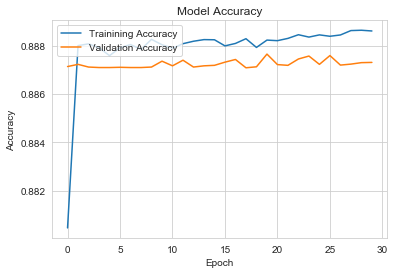

In [164]:
# Plot (summarize) history for Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Trainining Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

#### 6.5.2 Visualization of Model Loss

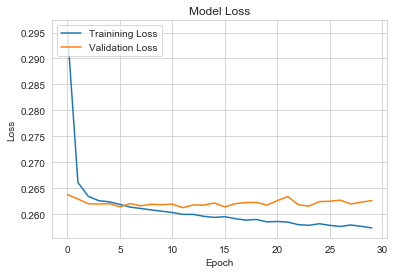

In [165]:
# Plot (summarize) history for Model Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Trainining Loss', 'Validation Loss'], loc='upper left')
plt.show()

#### Conclusion:
- **Plot of Model Accuracy**:
    - the model is well trained and for enough epochs as the trend for Accuracy on both datasets is stabilized
    - the model has not yet over-learned the training dataset, showing comparable skill on both datasets
- **Plot of Model Loss**:
    - the model has comparable performance on both Training and Validation datasets (labeled test)
    - if these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch

### 6.6 Predictions from the model on Testing data

- Predictions from the model are performed with observations that the model has never seen before
- Observations were previously stored in the Testing dataset (X_test)

In [166]:
# Predictions from the model based on the Testing dataset
predictions = model.predict_classes(X_test)
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

### 6.7 Evaluate the model on Testing data

- Provides the score for the Testing data
- Model predicts the class of the data and predicted class is matched with output Testing label to give the Accuracy
- Accuracy is the fraction of labels that the CNN predicts correctly

In [167]:
# Evaluate the performance of the model on Testing dataset
score = model.evaluate(X_test, y_test)

98805/98805 [==============================] - 3s 27us/step


#### 6.7.1 Calculate the Accuracy, Cross-entropy Loss and FNN Error

In [168]:
# Calculate the Accuracy of model prediction on Testing dataset
print('Test Accuracy: ', score[1])

Test Accuracy:  0.8876575231552124


In [169]:
# Calculate the Cross-entropy Loss of model prediction on Testing dataset
print('Test Loss:', score[0])

Test Loss: 0.2617759924035288


In [170]:
# Calculate the FNN Error of model prediction on Testing dataset
print("FNN Error: %.2f%%" % (100-score[1]*100))

FNN Error: 11.23%


##### Conclusion:
- Accuracy on Testing data is 88.77%, which is very powerful
- More than 88% of the predicted labels match the true labels of the Testing dataset
- Cross-entropy Loss on Testing data is 0.26
- Error of the Convolutional Neural Network is 11.23%

#### 6.7.2 Classification report

- Summarize (evaluate) the performance of the classifier on Testing data
- Basic terminology used in Classification report:								
    - **precision** -> how many times the positive prediction was actually positive (TP / (TP+FP))
	- **recall** -> out of all positive points how many were predicted positive (TP / (TP+FN))
	- **f1-score** -> Harmonic mean of precision and recall ((precision * recall) / (precision + recall))
	- **support** -> quantity per class

In [171]:
# Import the Classification report from Scikit-Learn metrics
from sklearn.metrics import classification_report

In [172]:
# Evaluate the performance of the model created with Keras on Test Data by using Classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.60     19458
           1       0.88      1.00      0.93     79347

    accuracy                           0.89     98805
   macro avg       0.93      0.72      0.77     98805
weighted avg       0.90      0.89      0.87     98805



##### Conclusion:
- Accuracy of 89% is OK, but not fantastic due to imbalanced dataset
- True class we should be looking is the one that has lower representation (minority class) and it is class 0
- True notification whether or not the model is doing well is f1-score on class 0
- It's apparent that the classifier is underperforming for class 0 in terms of recall and f1-score, but the precision is very good
- In order to improve f1-score, then we should play around model hyperparameters: add more layers, add more neurons, dropout rate, etc.

#### 6.7.3 Confusion matrix

- Summary of prediction results on a Classification problem
- Use performance metrics to describe (evaluate) the performance of the Classification models on Testing data for which the true values are already known
- Basic terminology used in Confusion Matrix:								
    - **True Positive (TP)** -> reality is yes and predict is yes
	- **False Positive (FP)** -> reality is no and predict is yes (Type 1 error)
	- **False Negative (FN)** -> reality is yes and predict is no (Type 2 error)
	- **True Negative (TN)** -> reality is no and predict is no

            TP | FN
            ___ ___

            FP | TN

In [173]:
# Import the Confusion matrix from Scikit-Learn metrics
from sklearn.metrics import confusion_matrix

In [174]:
# Evaluate the performance of the model created with Keras on Test Data by using Confusion matrix
print(confusion_matrix(y_test, predictions))

[[ 8499 10959]
 [  141 79206]]


##### Conclusion:
- Misclassifying on class 0, which causes a low recall
    - TP = 8499
    - FN = 10959
    - FP = 141
    - TN = 79206

### 6.8 Prediction on New Data

In [175]:
# Import random module that generate pseudo-random numbers
import random

# Initialize the random number generator
random.seed(101)

# Generate random number (index)
random_ind = random.randint(0, len(lending_df))

In [176]:
# Random new example with only features and dropped target label
new_customer = lending_df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [177]:
# Normalized / Scaled the data (features) of the new example
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [178]:
# Get the prediction for a new customer
model.predict_classes(new_customer)

array([[1]])

In [179]:
# True value of random observation
lending_df.iloc[random_ind]['loan_repaid']

1.0